In [1]:
#Load dataset dari Kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d aitude/aptos-augmented-images
!ls

Saving kaggle.json to kaggle.json
100% 2.77G/2.77G [00:38<00:00, 40.4MB/s]

aptos-augmented-images.zip  kaggle.json  sample_data


# Preprocessing Data

In [2]:
!unzip /content/aptos-augmented-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: aptos-augmented-images/aptos-augmented-images/2/7dd834c00140.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7de7beaf5e9f.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7dee6bf8b9c1.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7df4bb0f86f7.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7e0dc2e2fa5e.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7e6e90a93aa5.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7e9458de5707.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7ea51381ff6a.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7ec1ffe8220b.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7f17e6883f9f.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7f1f77407d32.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7f27681d

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [4]:
test=os.listdir('/content/aptos-augmented-images')
test0=os.listdir('/content/aptos-augmented-images/0')
test1=os.listdir('/content/aptos-augmented-images/2')
test2=os.listdir('/content/aptos-augmented-images/2')
test3=os.listdir('/content/aptos-augmented-images/3')
test4=os.listdir('/content/aptos-augmented-images/4')

print("Total Folder: ",len(test))
print("Class 0: ",len(test0))
print("Class 1: ",len(test1))
print("Class 2: ",len(test2))
print("Class 3: ",len(test3))
print("Class 4: ",len(test4))


Total Folder:  6
Class 0:  2000
Class 1:  2000
Class 2:  2000
Class 3:  2000
Class 4:  2000


In [5]:
# !mkdir citra

In [6]:
# !mkdir /content/citra/NoDR
# !mkdir /content/citra/Mild
# !mkdir /content/citra/Moderate
# !mkdir /content/citra/Severe
# !mkdir /content/citra/ProliferativeDR

In [7]:
# #train move
# import shutil
# import os

# source_dir = '/content/train/0'
# target_dir = '/content/citra/NoDR'
# source_dir1 = '/content/train/1'
# target_dir1 = '/content/citra/Mild'
# source_dir2 = '/content/train/2'
# target_dir2 = '/content/citra/Moderate'
# source_dir3 = '/content/train/3'
# target_dir3 = '/content/citra/Severe'
# source_dir4 = '/content/train/4'
# target_dir4 = '/content/citra/ProliferativeDR'
    
# file_names = os.listdir(source_dir)
# file_names1 = os.listdir(source_dir1)
# file_names2 = os.listdir(source_dir2)
# file_names3 = os.listdir(source_dir3)
# file_names4 = os.listdir(source_dir4)
    
# for file_name in file_names:
#     shutil.move(os.path.join(source_dir, file_name), target_dir)

# for file_names1 in file_names1:
#     shutil.move(os.path.join(source_dir1, file_names1), target_dir1)

# for file_names2 in file_names2:
#     shutil.move(os.path.join(source_dir2, file_names2), target_dir2)

# for file_names3 in file_names3:
#     shutil.move(os.path.join(source_dir3, file_names3), target_dir3)

# for file_names4 in file_names4:
#     shutil.move(os.path.join(source_dir4, file_names4), target_dir4)

In [8]:
# !mkdir citra_baru

In [9]:
# !mkdir /content/citra_baru/NoDR
# !mkdir /content/citra_baru/Mild
# !mkdir /content/citra_baru/Moderate
# !mkdir /content/citra_baru/Severe
# !mkdir /content/citra_baru/ProliferativeDR

In [10]:
# import os
# import numpy as np
# import shutil
# import pandas as pd


# def train_test_split():
#     print("########### Train Test Val Script started ###########")
#     #data_csv = pd.read_csv("DataSet_Final.csv") ##Use if you have classes saved in any .csv file

#     root_dir = '/content/citra_baru'
#     classes_dir = ['NoDR', 'Mild', 'Moderate', 'Severe','ProliferativeDR']


#     processed_dir = '/content/citra'

#     val_ratio = 0.20
#     test_ratio = 0.10

#     for cls in classes_dir:
#         # Creating partitions of the data after shuffeling
#         print("$$$$$$$ Class Name " + cls + " $$$$$$$")
#         src = processed_dir +"/" + cls  # Folder to copy images from

#         allFileNames = os.listdir(src)
#         np.random.shuffle(allFileNames)
#         train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                                   [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
#                                                                    int(len(allFileNames) * (1 - test_ratio)),
#                                                                    ])

#         train_FileNames = [src + '/' + name for name in train_FileNames.tolist()]
#         val_FileNames = [src + '/' + name for name in val_FileNames.tolist()]
#         test_FileNames = [src + '/' + name for name in test_FileNames.tolist()]

#         print('Total images: '+ str(len(allFileNames)))
#         print('Training: '+ str(len(train_FileNames)))
#         print('Validation: '+  str(len(val_FileNames)))
#         print('Testing: '+ str(len(test_FileNames)))

#         # # Creating Train / Val / Test folders (One time use)
#         os.makedirs(root_dir + '/train/' + cls)
#         os.makedirs(root_dir + '/val/' + cls)
#         os.makedirs(root_dir + '/test/' + cls)

#         # Copy-pasting images
#         for name in train_FileNames:
#             shutil.copy(name, root_dir + '/train/' + cls)

#         for name in val_FileNames:
#             shutil.copy(name, root_dir + '/val/' + cls)

#         for name in test_FileNames:
#             shutil.copy(name, root_dir + '/test/' + cls)

#     print("########### Train Test Val Script Ended ###########")

# train_test_split()

In [11]:
# os.rename("/content/test/0","/content/test/NoDR")
# os.rename("/content/test/1","/content/test/Mild")
# os.rename("/content/test/2","/content/test/Moderate")
# os.rename("/content/test/3","/content/test/Severe")
# os.rename("/content/test/4","/content/test/ProliferativeDR")

os.rename("/content/aptos-augmented-images/0","/content/aptos-augmented-images/NoDR")
os.rename("/content/aptos-augmented-images/1","/content/aptos-augmented-images/Mild")
os.rename("/content/aptos-augmented-images/2","/content/aptos-augmented-images/Moderate")
os.rename("/content/aptos-augmented-images/3","/content/aptos-augmented-images/Severe")
os.rename("/content/aptos-augmented-images/4","/content/aptos-augmented-images/ProliferativeDR")


In [12]:
import shutil, os
shutil.rmtree(r'/content/aptos-augmented-images/aptos-augmented-images')
os.remove('/content/aptos-augmented-images.zip')

In [13]:
# TRAIN_DIR = '/content/citra_baru/train/'
# VAL_DIR = '/content/citra_baru/val/'
# TEST_DIR = '/content/citra_baru/test/'

In [14]:
# labels = ['NoDR', 'Mild', 'Moderate', 'Severe','ProliferativeDR']

In [15]:
# !rmdir /content/citra_baru/NoDR
# !rmdir /content/citra_baru/Mild
# !rmdir /content/citra_baru/Moderate
# !rmdir /content/citra_baru/Severe
# !rmdir /content/citra_baru/ProliferativeDR

In [16]:
image_dir = Path('/content/aptos-augmented-images/')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [17]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

,Filepath,Label
0,/content/aptos-augmented-images/Mild/2e2ffdf8c...,Mild
1,/content/aptos-augmented-images/Moderate/bae43...,Moderate
2,/content/aptos-augmented-images/Severe/abe168a...,Severe


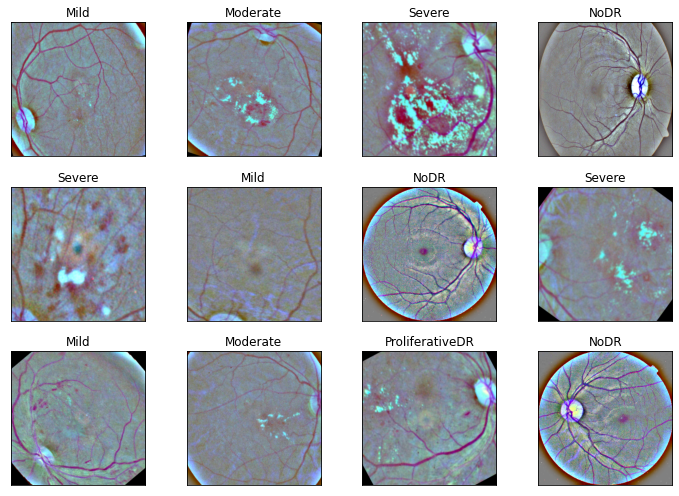

In [18]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

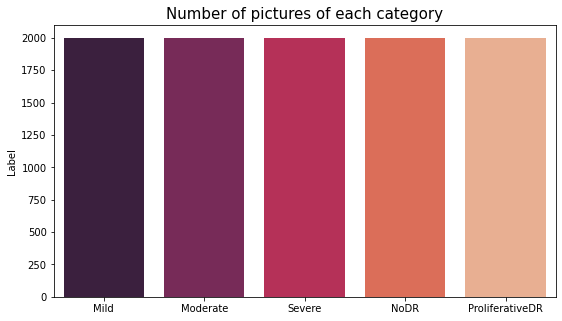

In [19]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [21]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             shear_range = 0.2,
                             fill_mode = 'nearest',
                             preprocessing_function=preprocess_input,)

val_datagen = ImageDataGenerator(rescale=1./255,
                                 preprocessing_function=preprocess_input)
                                   
train_data = datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=12,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

test_data = val_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=12,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 8000 validated image filenames belonging to 5 classes.
Found 2000 validated image filenames belonging to 5 classes.


# Efficient Net B7

In [22]:
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [23]:
import efficientnet.tfkeras as ef

In [24]:
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.93 and logs.get('val_acc') > 0.93):
      print("\nStopped! Akurasi Train Validasi sudah mencapai 93%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [25]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
model = ef.EfficientNetB7(weights = 'imagenet', 
                          include_top = False, 
                          input_shape = (224, 224, 3),
                          pooling='avg')

inputs = model.input

# x = Flatten()
# x = Dropout(0.5)

x = Dense(64, activation='relu')(model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['acc'])

258449408/258434480 [==============================] - 3s 0us/step


In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 64) 0           stem_bn[0][0]                    
______________________________________________________________________________________________

In [27]:
history=model.fit(train_data,
                  validation_data=test_data,
                  steps_per_epoch=train_data.n/16,
                  validation_steps=test_data.n/16,
                  epochs=20,
                  callbacks=[stop],verbose=1)

Epoch 1/20
500/500 [==============================] - 820s 2s/step - loss: 1.1089 - acc: 0.5395 - val_loss: 0.8600 - val_acc: 0.6493
Epoch 2/20
500/500 [==============================] - 748s 1s/step - loss: 0.8068 - acc: 0.6771 - val_loss: 0.6524 - val_acc: 0.7307
Epoch 3/20
500/500 [==============================] - 746s 1s/step - loss: 0.7008 - acc: 0.7280 - val_loss: 0.6312 - val_acc: 0.7433
Epoch 4/20
500/500 [==============================] - 747s 1s/step - loss: 0.6198 - acc: 0.7607 - val_loss: 0.5611 - val_acc: 0.7693
Epoch 5/20
500/500 [==============================] - 746s 1s/step - loss: 0.5420 - acc: 0.7895 - val_loss: 0.5428 - val_acc: 0.8053
Epoch 6/20
500/500 [==============================] - 747s 1s/step - loss: 0.4884 - acc: 0.8169 - val_loss: 0.4489 - val_acc: 0.8280
Epoch 7/20
500/500 [==============================] - 749s 1s/step - loss: 0.4314 - acc: 0.8392 - val_loss: 0.3989 - val_acc: 0.8560
Epoch 8/20
500/500 [==============================] - 745s 1s/step - 

# Plotting Model

In [28]:
import matplotlib.pyplot as plt

In [29]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

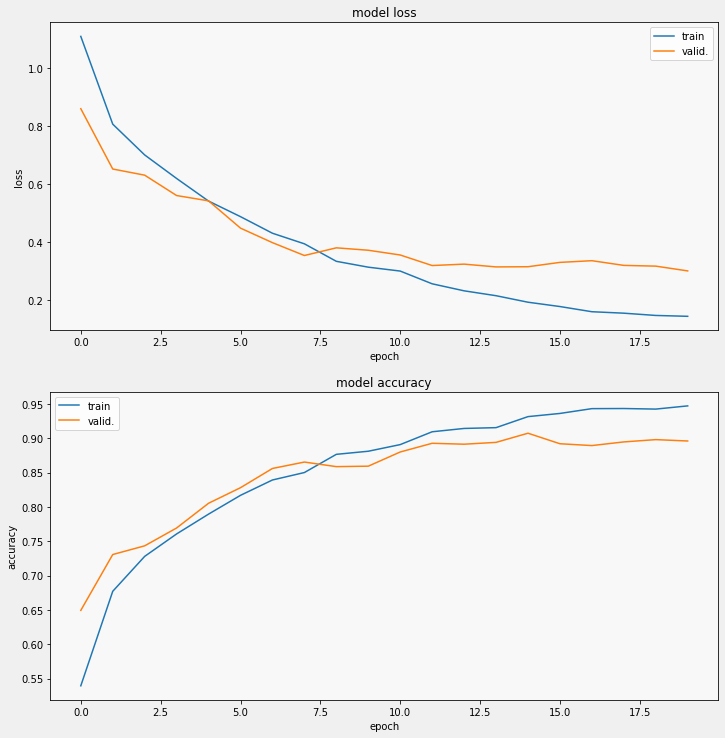

In [30]:
#display
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)

# Evaluation & Prediction

In [31]:
# Predict the label of the test_images
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['ProliferativeDR', 'Mild', 'Mild', 'Moderate', 'Severe']


In [39]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

           Mild       0.89      0.85      0.87       432
       Moderate       0.79      0.82      0.80       372
           NoDR       0.99      0.98      0.98       374
ProliferativeDR       0.91      0.91      0.91       428
         Severe       0.91      0.93      0.92       394

       accuracy                           0.90      2000
      macro avg       0.90      0.90      0.90      2000
   weighted avg       0.90      0.90      0.90      2000



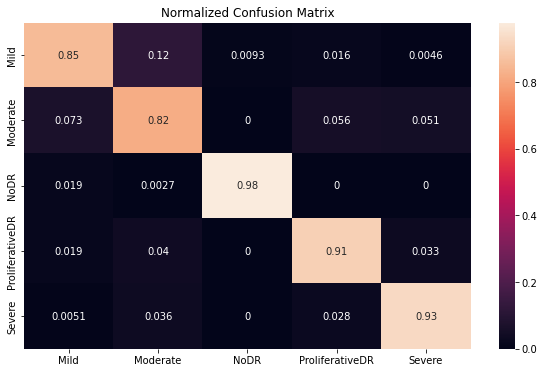

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test Accuracy = 0.90


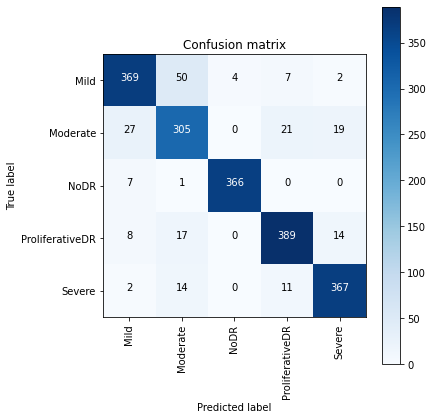

In [42]:
import itertools
from itertools import chain
from sklearn.metrics import accuracy_score, confusion_matrix

for x_model in [{'name':'EfficientNetB7','history':history,'model':model},]:
    # validate on val set
    accuracy = accuracy_score(y_test, pred)
    print('Test Accuracy = %.2f' % accuracy)

    confusion_mtx = confusion_matrix(y_test, pred) 
    cm = plot_confusion_matrix(confusion_mtx, classes = sorted(set(y_test)), normalize=False)

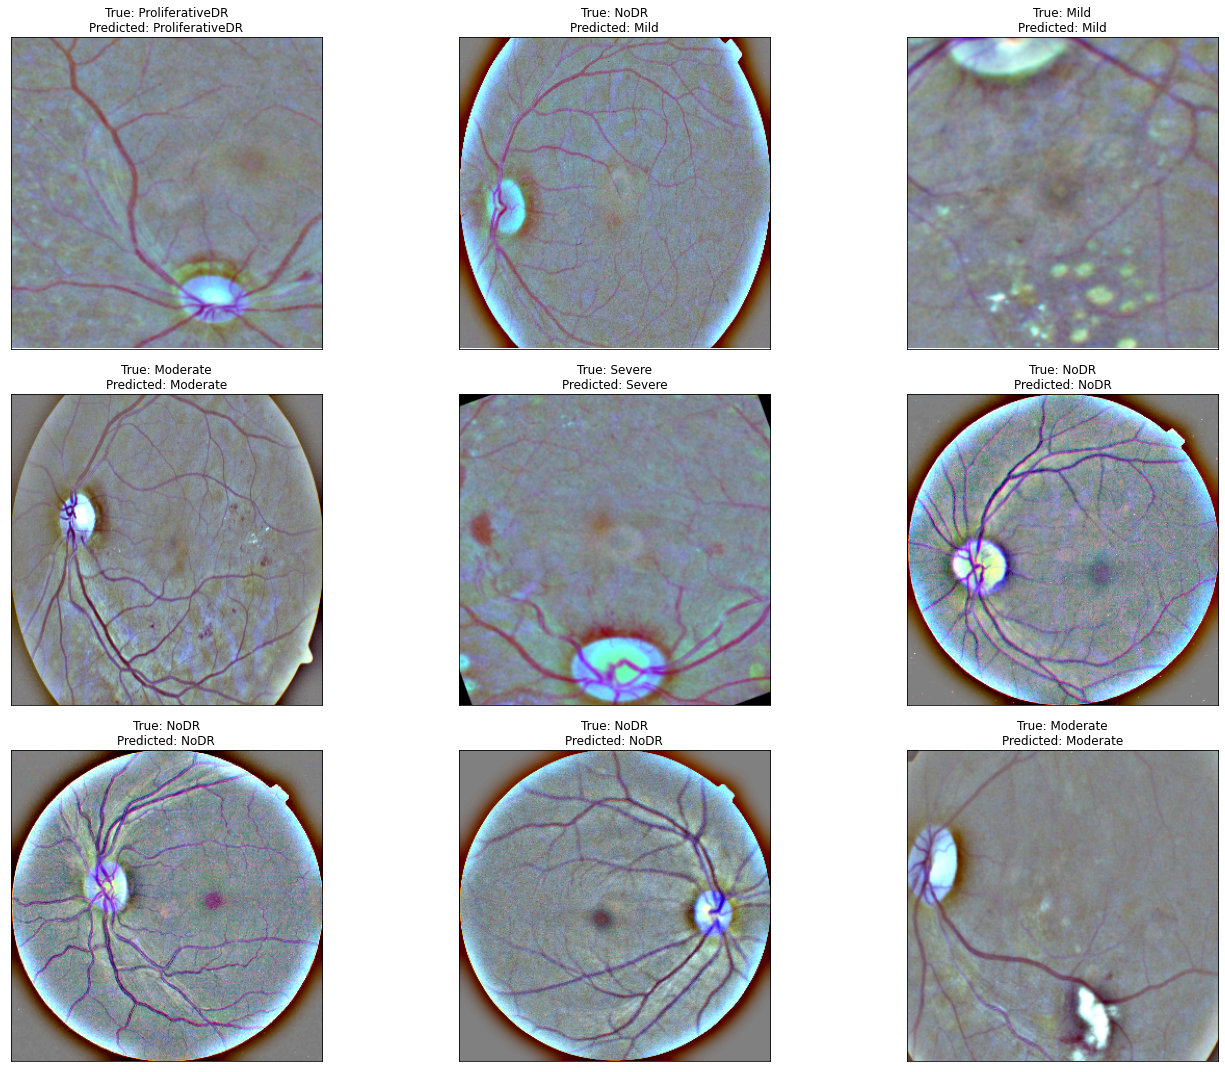

In [43]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [38]:
model.save('efficientnetb7_20.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
